# **Importing Data + Data Cleaning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personal Project/data/kc_house_data.csv')

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [7]:
df.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [8]:
df = df.drop(columns=['id'])

In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

# **Checking Linear Relationships**

<Axes: xlabel='sqft_living', ylabel='price'>

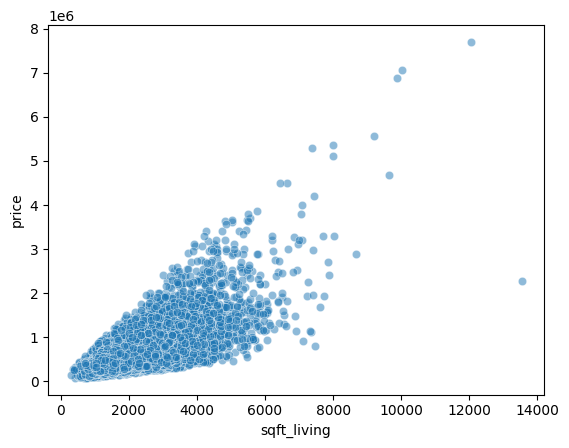

In [10]:
sns.scatterplot(data=df, x='sqft_living', y='price', alpha=0.5)

<Axes: xlabel='sqft_lot', ylabel='price'>

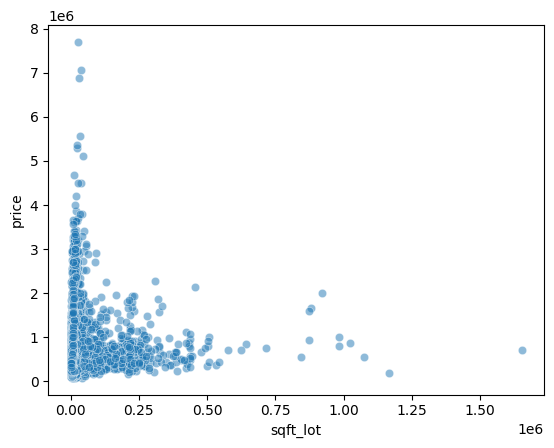

In [11]:
sns.scatterplot(data=df, x='sqft_lot', y='price', alpha=0.5)

<Axes: xlabel='sqft_above', ylabel='price'>

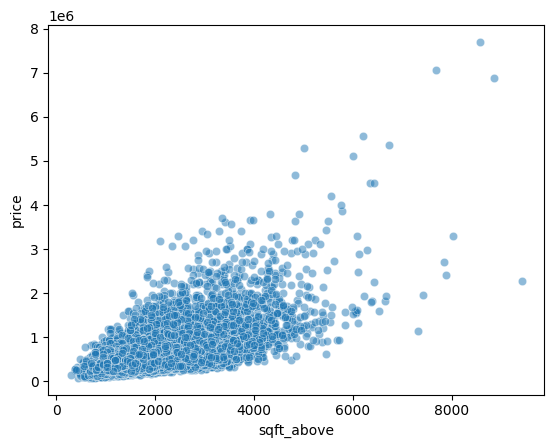

In [12]:
sns.scatterplot(data=df, x='sqft_above', y='price', alpha=0.5)

<Axes: xlabel='sqft_basement', ylabel='price'>

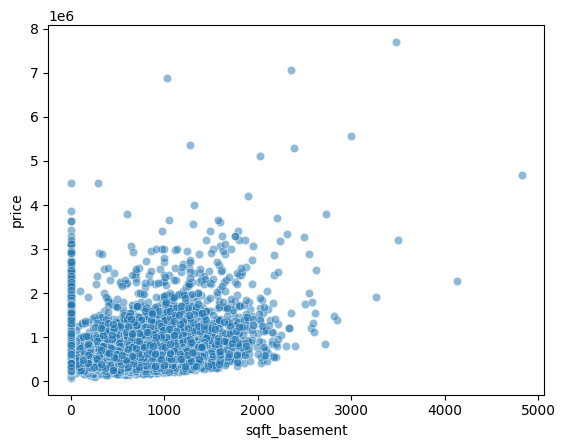

In [13]:
sns.scatterplot(data=df, x='sqft_basement', y='price', alpha=0.5)

<Axes: xlabel='zipcode', ylabel='price'>

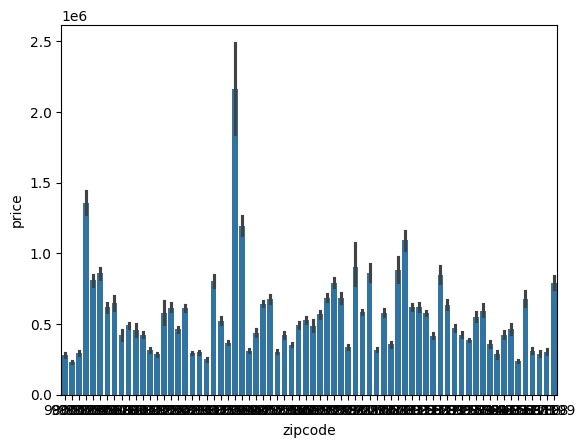

In [14]:
sns.barplot(data=df, x='zipcode', y='price')

<Axes: xlabel='waterfront', ylabel='price'>

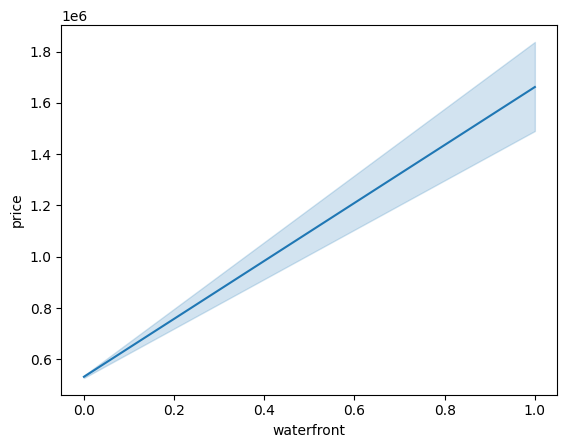

In [15]:
sns.lineplot(data=df, x='waterfront', y='price')

<Axes: xlabel='bedrooms', ylabel='price'>

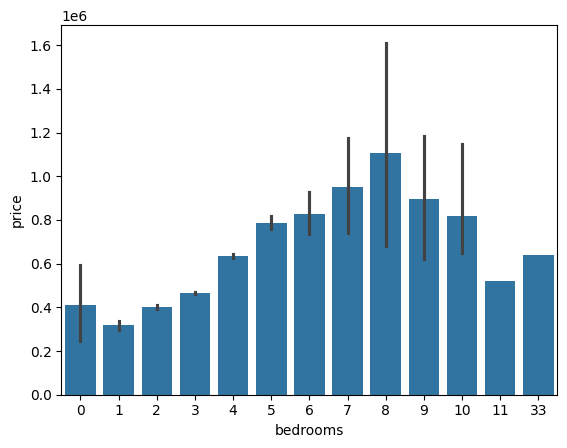

In [16]:
sns.barplot(data=df, x='bedrooms', y='price')

<Axes: xlabel='view', ylabel='price'>

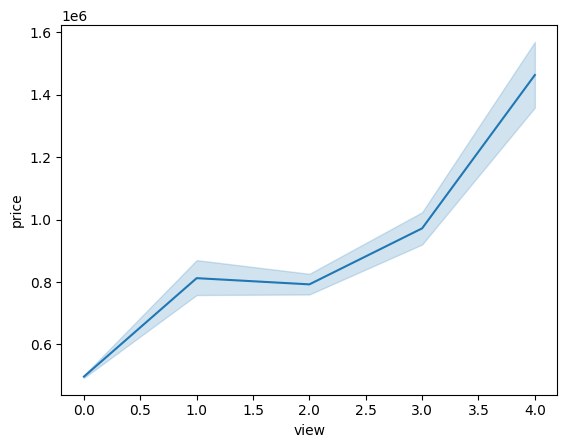

In [17]:
sns.lineplot(data=df, x='view', y='price')

<Axes: xlabel='yr_built', ylabel='price'>

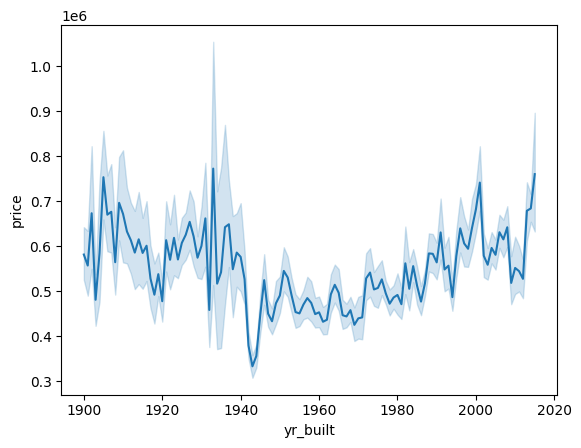

In [18]:
sns.lineplot(data=df, x='yr_built', y='price')

<Axes: xlabel='date', ylabel='price'>

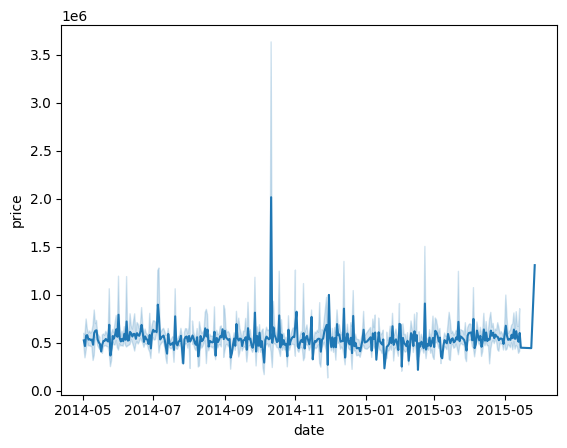

In [19]:
sns.lineplot(data=df, x='date', y='price')

<Axes: xlabel='long', ylabel='lat'>

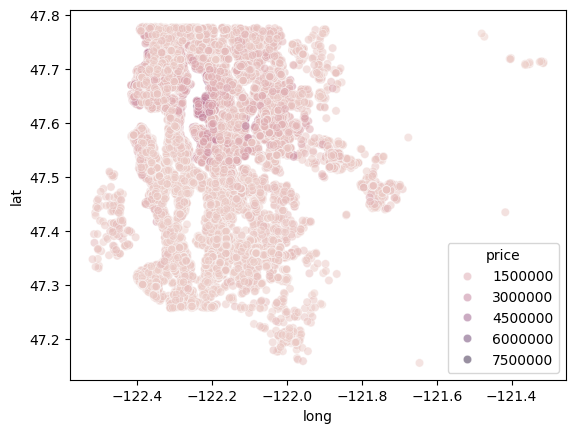

In [20]:
sns.scatterplot(data=df, x='long', y='lat', hue='price', alpha=0.5)

# **Linear Regression**

In [21]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [23]:
X = df.drop(columns=['date', 'price'])
y = df['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

123224.92269170494
33957469163.087692
0.7070935240287654


# **Random Forest Regression**

In [31]:
rfr = RandomForestRegressor()

In [32]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred_rfr = rfr.predict(X_test)

In [34]:
print(mean_absolute_error(y_test, y_pred_rfr))
print(mean_squared_error(y_test, y_pred_rfr))
print(r2_score(y_test, y_pred_rfr))

68147.32523664123
13253078421.293613
0.8856831032516632


# **Gradient Booster Regression**

In [35]:
gbr = GradientBoostingRegressor()

In [36]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [37]:
y_pred_gbr = gbr.predict(X_test)

In [38]:
print(mean_absolute_error(y_test, y_pred_gbr))
print(mean_squared_error(y_test, y_pred_gbr))
print(r2_score(y_test, y_pred_gbr))

77082.5534469952
15982086856.46248
0.8621435326257703


# **Stacking Regressor**

In [ ]:
from sklearn.ensemble import StackingRegressor, VotingRegressor

In [ ]:
estimators = [
    ('rfr', rfr),
    ('gbr', gbr),
    ('ridge', ridge),
]

In [ ]:
sr = StackingRegressor(
    estimators = estimators,
    final_estimator = lr,
)

In [ ]:
sr.fit(X_train, y_train)

StackingRegressor(estimators=[('rfr', RandomForestRegressor()),
                              ('gbr', GradientBoostingRegressor()),
                              ('ridge', Ridge())],
                  final_estimator=LinearRegression())

In [ ]:
y_pred_sr = sr.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test, y_pred_sr))
print(mean_squared_error(y_test, y_pred_sr))
print(r2_score(y_test, y_pred_sr))

69635.53805445331
13766280176.490238
0.8812563859113646


In [ ]:
vr = VotingRegressor([
    ('rfr', rfr),
    ('gbr', gbr),
    ('ridge', ridge),
])

In [ ]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('rfr', RandomForestRegressor()),
                            ('gbr', GradientBoostingRegressor()),
                            ('ridge', Ridge())])

In [ ]:
y_pred_vr = vr.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test, y_pred_sr))
print(mean_squared_error(y_test, y_pred_sr))
print(r2_score(y_test, y_pred_sr))

69635.53805445331
13766280176.490238
0.8812563859113646
